In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
data = pd.read_csv('/content/drive/MyDrive/Academic/ML/Lab05/data/winequality-red.csv', delimiter=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [56]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)
data['quality'] = data['quality'].map({'bad' : 0, 'good' : 1})

<ipython-input-57-cae4ef45721a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='pearson'), annot=True, square=True)


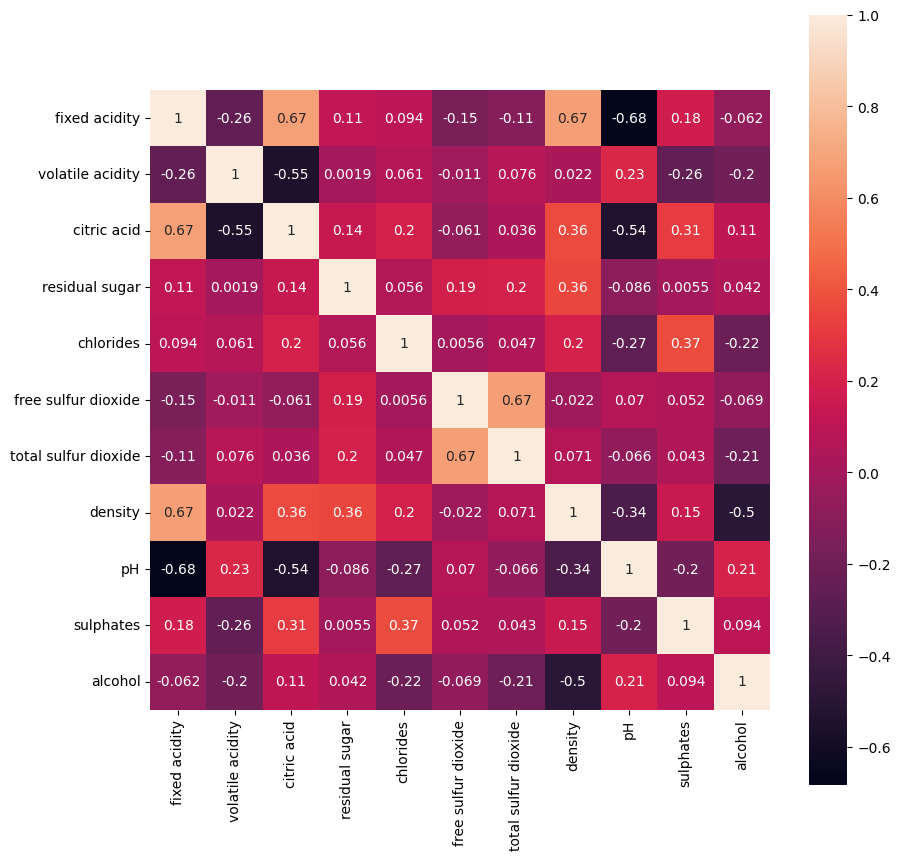

In [57]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(method='pearson'), annot=True, square=True)
plt.show()

# Задание 1

1. Для классификационного набора данных Wine quality из предыдущих лабораторных работ выполните построение главных компонент. Предварительно не забудьте очистить и нормализовать набор данных.

In [58]:
# Maybe not need :)
from sklearn.preprocessing import StandardScaler
import numpy as np
# Creating the StandardScaler object
scaler = StandardScaler()

# Fitting the scaler on the data and transforming the data
X_standardized = scaler.fit_transform(data)
X_standardized

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.39625599],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.39625599],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.39625599],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988, -0.39625599],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.39625599],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988, -0.39625599]])

In [59]:
from sklearn.decomposition import PCA

X = data.drop(['quality'], axis=1)
y = data['quality']

# n_components = 2
pca = PCA(n_components=None)

# Fitting the PCA model and transforming the data
X_pca = pca.fit_transform(data)

# Displaying the original and transformed data
print("Original matrix:")
print(data)

print("\nTransformed matrix after PCA:")
print(X_pca)

# Explained variance ratio for each component
print("\nExplained variance ratio for each component:")
print(pca.explained_variance_ratio_)

Original matrix:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free

In [60]:
pca = PCA()
pca.fit(X)
X_pca = pca.transform(X)
print("Исходная размерность:   ", X.shape)
print("Преобразованная размерность:", X_pca.shape)

Исходная размерность:    (1599, 11)
Преобразованная размерность: (1599, 11)


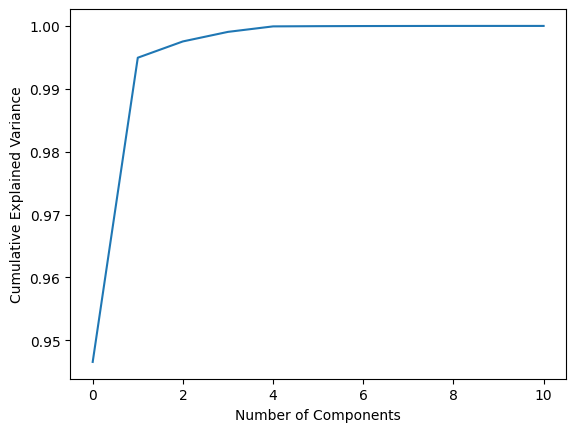

In [61]:

explained_variance_ratio = pca.explained_variance_ratio_

# Scree plot
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
# plt.title('')
plt.show()

# Задание 2

2. Постройте график объясняемой дисперсии. Сделайте выводы по информативности компонент. Постройте классификатор, основанный на деревьях принятия решений (дерево или случайный лес) по компонентам, объясняющим более 75% дисперсии.

In [62]:
X = data.drop(['quality'], axis=1)
y = data['quality']

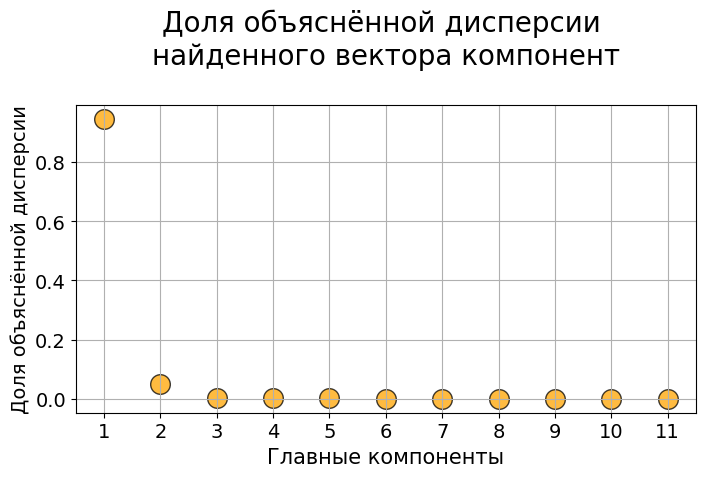

[9.46576976e-01 4.83683046e-02 2.58917183e-03 1.51896798e-03
 8.73553990e-04 3.45607218e-05 1.93627614e-05 9.47278079e-06
 8.41376628e-06 1.21472798e-06 4.68762788e-10]


In [63]:
n_components = None

pca = PCA(n_components=n_components)
f_pca = pca.fit(X)
plt.figure(figsize=(8,4))
plt.scatter(x=[i+1 for i in range(len(f_pca.explained_variance_ratio_))],
            y=f_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Доля объяснённой дисперсии \nнайденного вектора компонент\n", fontsize=20)
plt.xlabel("Главные компоненты",fontsize=15)
plt.xticks([i+1 for i in range(len(f_pca.explained_variance_ratio_))], fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Доля объяснённой дисперсии",fontsize=14)
plt.show()
print(f_pca.explained_variance_ratio_)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score

n_components = 1

X_pca = pca.fit_transform(data.drop(['quality'], axis=1))
y = data['quality']

X_selected_components = X_pca[:, :n_components]

X_train, X_test, y_train, y_test = train_test_split(X_selected_components, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

f1_score_dt = f1_score(y_test, y_pred)
print(f"Decision Tree Classifier F1 Score: {f1_score_dt}")

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

f1_score_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest Classifier F1 Score: {f1_score_rf}")


Decision Tree Classifier F1 Score: 0.4090909090909091
Random Forest Classifier F1 Score: 0.4090909090909091


# Задание 3

3. Включите PCA в цепочку модели и, считая число компонент гиперпараметром, с помощью поиска по сетке (GridSearchCV) определите число компонент и другие гиперпараметры классификатора, дающие более качественный классификатор.

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score

X = data.drop(['quality'], axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA()
scaler = StandardScaler()
logistic = LogisticRegression(max_iter=10000, tol=0.1)

pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])


X_train_scaled = scaler.fit_transform(X_train)
pca.fit(X_train_scaled)

param_grid = {
"scaler__with_mean": [True, False],
"scaler__with_std": [True, False],
"pca__n_components": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
"logistic__C": np.logspace(-4, 4, 9),
}

search = GridSearchCV(pipe, param_grid, n_jobs=2, cv=5)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

y_pred = search.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best parameter (CV score=0.887):
{'logistic__C': 10.0, 'pca__n_components': 9, 'scaler__with_mean': True, 'scaler__with_std': False}
Test Accuracy: 0.859375
F1 Score: 0.8417522831050228
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       273
           1       0.54      0.30      0.38        47

    accuracy                           0.86       320
   macro avg       0.71      0.63      0.65       320
weighted avg       0.84      0.86      0.84       320



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Test F1 Score: 0.7855080101180439


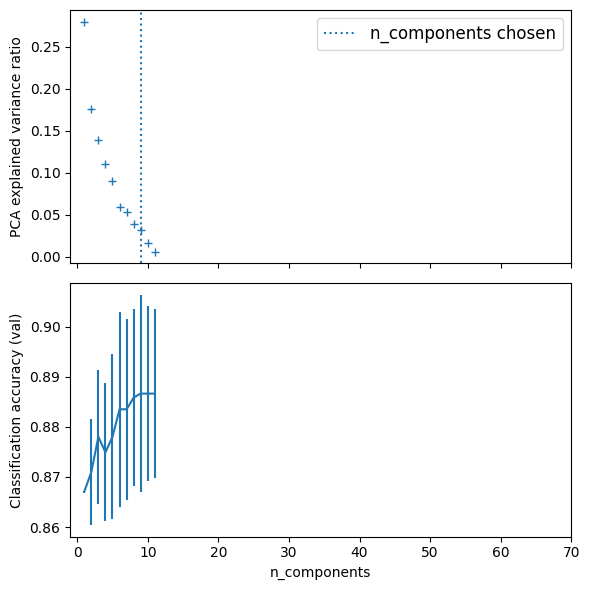

In [66]:

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

# Evaluate the model on the test set and plot F1 score
X_test_scaled = scaler.transform(X_test)
y_pred = search.predict(X_test_scaled)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Test F1 Score:", f1)

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

In [67]:
# Build a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest Classifier
f1_score_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest Classifier F1 Score: {f1_score_rf}")

Random Forest Classifier F1 Score: 0.5999999999999999


# Задание 4

4. Сравните число найденных компонент в п.3 и объясняемую дисперсию с результатом из п.2. Сопоставьте количество новых признаков с набором признаков исходного набора данных.

In [68]:
n_components_selected = pca.n_components_
explained_variance_ratio = pca.explained_variance_ratio_

# # Print the results
print(f"Number of components selected: {n_components_selected}")
print(f"Explained variance ratio: {explained_variance_ratio}")
print(f"Cumulative explained variance: {explained_variance_ratio.sum()}")

# Сравненние количества новых признаков с набором функций исходного набора данных
original_num_features = data.shape[1]
print(f"Number of original features: {original_num_features}")
print(f"Number of new features (components): {n_components_selected}")

Number of components selected: 11
Explained variance ratio: [0.2801769  0.17563995 0.13957636 0.11081822 0.09021248 0.05908698
 0.05266627 0.03883888 0.03129468 0.01600997 0.0056793 ]
Cumulative explained variance: 0.9999999999999999
Number of original features: 12
Number of new features (components): 11
